In [1]:
import sys
sys.path.append("../src")

import generate_general_networks as generate
import torch
import matplotlib.pyplot as plt
import json
import numpy as np
import tikzplotlib

In [2]:
# Load results from optimization
f = open("../optimization_results/general_optimization/single_junction.json")
results = json.load(f)
f.close()

f = open("../optimization_results/general_optimization/single_junction_1.json")
results_1 = json.load(f)
f.close()

In [3]:
# Collecting network configuration
network_file = results['network_file']
f = open("../"+network_file)
network_config = json.load(f)
f.close()

T = network_config['T']
N = network_config['N']
controls = network_config['control_points']

In [4]:
# Collecting the parameters and objective values
start_parameters = results['parameters'][0]
opt_parameters = results['parameters'][-1]
objective_vals = results['objectives']
parameters = results['parameters']

start_parameters_1 = results_1['parameters'][0]
opt_parameters_1 = results_1['parameters'][-1]
objective_vals_1 = results_1['objectives']
parameters_1 = results_1['parameters']


In [5]:
# Create the networks
start_speed = [[torch.tensor(start_parameters[i])] for i in range(2)]
opt_speed = [[torch.tensor(opt_parameters[i])] for i in range(2)]
start_cycle = [torch.tensor(start_parameters[2]), torch.tensor(start_parameters[3])]
opt_cycle = [torch.tensor(opt_parameters[2]), torch.tensor(opt_parameters[3])]

start_speed_1 = [[torch.tensor(start_parameters_1[i])] for i in range(2)]
opt_speed_1 = [[torch.tensor(opt_parameters_1[i])] for i in range(2)]
start_cycle_1 = [torch.tensor(start_parameters_1[2]), torch.tensor(start_parameters_1[3])]
opt_cycle_1 = [torch.tensor(opt_parameters_1[2]), torch.tensor(opt_parameters_1[3])]

start_network = generate.single_junction_network(T, N, start_speed, controls, start_cycle, track_grad=False)
opt_network = generate.single_junction_network(T, N, opt_speed, controls, opt_cycle, track_grad=False)
start_network_1 = generate.single_junction_network(T, N, start_speed_1, controls, start_cycle_1, track_grad=False)
opt_network_1 = generate.single_junction_network(T, N, opt_speed_1, controls, opt_cycle_1, track_grad=False)

In [6]:
# Do the simulations
densities, _, lengths, delays, n_stops = start_network.solve_cons_law_counting()
opt_densities, _, opt_lengths, opt_delays, opt_n_stops = opt_network.solve_cons_law_counting()

densities_1, _, lengths_1, delays_1, n_stops_1 = start_network_1.solve_cons_law_counting()
opt_densities_1, _, opt_lengths_1, opt_delays_1, opt_n_stops_2 = opt_network_1.solve_cons_law_counting()

Bus bus_1 reached bus stop 0 at time 79.92864227294922, should wait for 29.869848251342773 seconds
Bus bus_1 reached bus stop 0 at time 34.91429901123047, should wait for 29.798189163208008 seconds
Bus bus_1 reached bus stop 0 at time 113.23703002929688, should wait for 29.854145050048828 seconds
Bus bus_1 reached bus stop 0 at time 34.91429901123047, should wait for 29.798189163208008 seconds


In [7]:
for road in start_network.roads:
    print(road.id, road.b*road.L)

first_road 100
second_road 100


In [10]:
# Converting from dict to lists
times = list(lengths[0].keys())
distance = list(lengths[0].values())

end_times = list(opt_lengths[0].keys())
end_distance = list(opt_lengths[0].values())

times_1 = list(lengths_1[0].keys())
distance_1 = list(lengths_1[0].values())

end_times_1 = list(opt_lengths_1[0].keys())
end_distance_1 = list(opt_lengths_1[0].values())

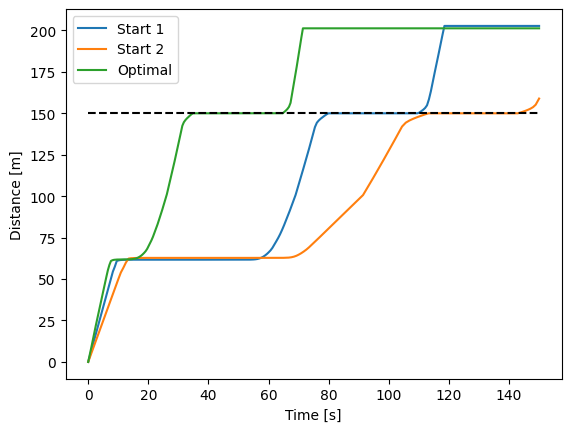

In [11]:
# Plotting results

plt.plot(times, distance, label = "Start 1")
plt.plot(times_1, distance_1, label = "Start 2")
plt.plot(end_times, end_distance, label = "Optimal")
plt.plot([0, 150], [150, 150], '--k')
plt.ylabel("Distance [m]")
plt.xlabel("Time [s]")
plt.legend()
tikzplotlib.save("../figurer/single_junction_dist_time.tex")

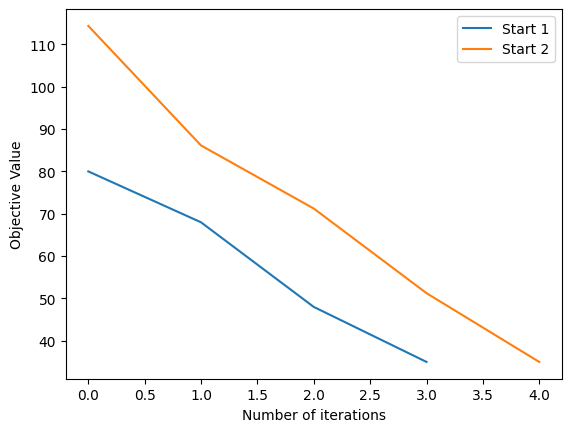

In [19]:
plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1], label = "Start 1")
plt.plot([i for i in range(len(objective_vals_1)-1)], objective_vals_1[:-1], label = "Start 2")

plt.xlabel("Number of iterations")
plt.ylabel("Objective Value")
plt.legend()
tikzplotlib.save("../figurer/single_junc_conv.tex")

In [9]:
print([p[0] for p in parameters_1])

[30.0, 41.821311712273854, 50.0, 50.0, 50.0, 50.0]


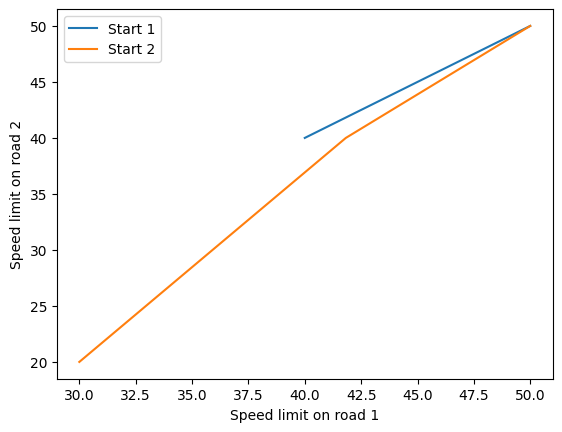

In [26]:
plt.plot([p[0] for p in parameters], [p[1] for p in parameters], label = "Start 1")
plt.plot([p[0] for p in parameters_1], [p[1] for p in parameters_1], label = "Start 2")


plt.xlabel("Speed limit on road 1")
plt.ylabel("Speed limit on road 2")
plt.legend()
tikzplotlib.save("../figurer/single_junc_speeds.tex")

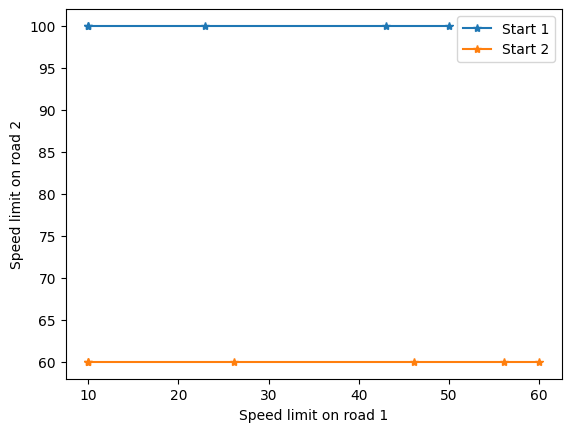

In [29]:
plt.plot([p[2] for p in parameters], [p[3] for p in parameters], '-*', label = "Start 1")
plt.plot([p[2] for p in parameters_1], [p[3] for p in parameters_1], '-*', label = "Start 2")


plt.xlabel("Speed limit on road 1")
plt.ylabel("Speed limit on road 2")
plt.legend()
tikzplotlib.save("../figurer/single_junc_cycle.tex")
